# Hold-up Tank Model


This notebook will show the basics of using fmdtools to simulate hazards in a system with human-component interactions, including:

- human-induced failure modes
- human responses to component failure modes
- joint human-component failure modes

The system to model is in `tank_model.py`.

```
Copyright © 2024, United States Government, as represented by the Administrator of the National Aeronautics and Space Administration. All rights reserved.

The “"Fault Model Design tools - fmdtools version 2"” software is licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0. 

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.
```

In [9]:
import fmdtools.sim.propagate as propagate
import fmdtools.analyze as an
from tank_model import Tank
from fmdtools.sim.sample import FaultDomain, FaultSample
from fmdtools.define.architecture.function import FunctionArchitectureGraph

## Tank Architecture(s)

The tank has two architectures: the high-level functional architecture and the action architecture of the Human function.


Below is the functional architecture:

(<Figure size 550x550 with 1 Axes>, <Axes: >)

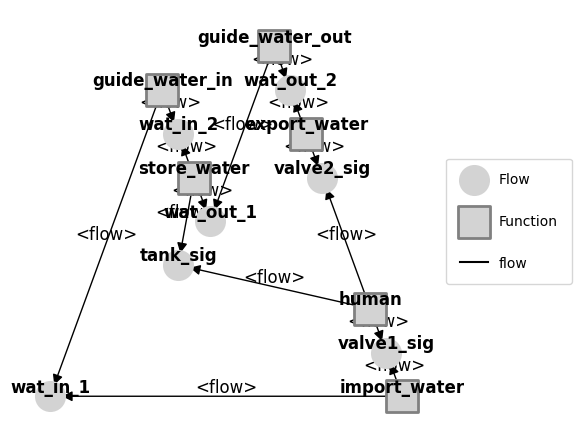

In [10]:
mdl = Tank()
gr = mdl.as_modelgraph()
gr.draw(figsize=(5.5,5.5))

And here is the human Action Architecture:

(<Figure size 1200x1000 with 1 Axes>, <Axes: >)

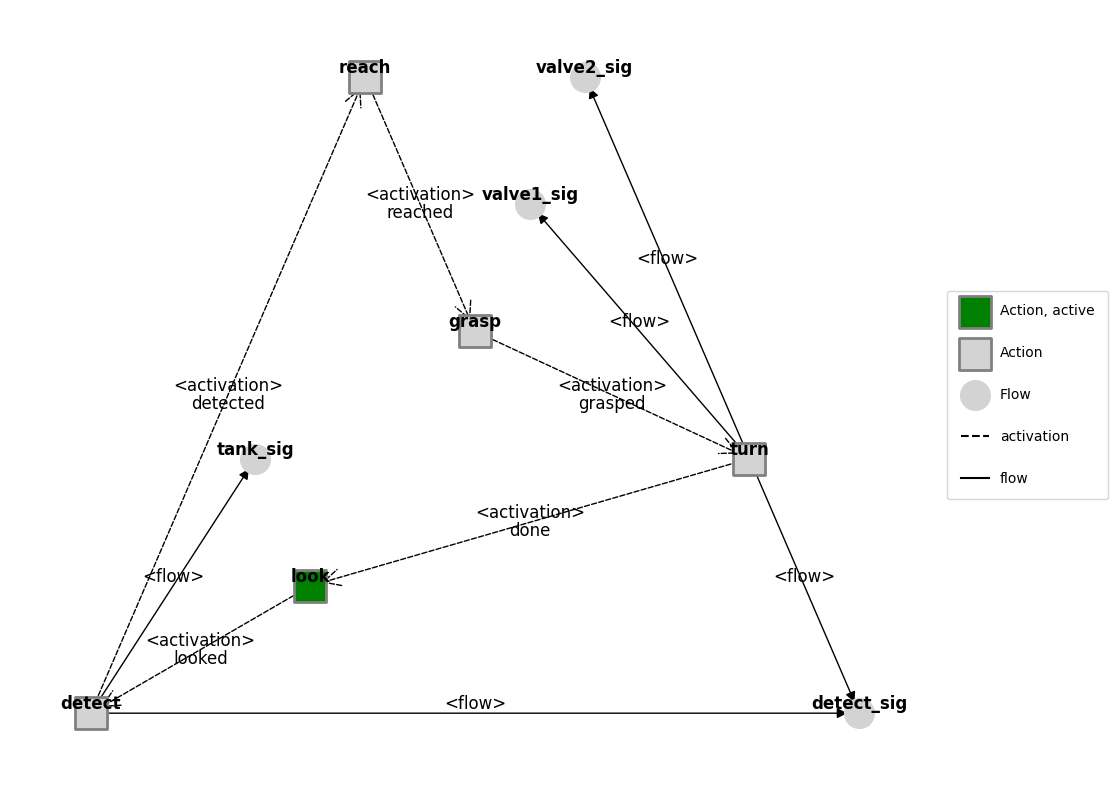

In [11]:
aa = mdl.fxns['human'].aa
gr = aa.as_modelgraph()
gr.draw()

## Tank Analysis
### Verifying the nominal state:

In the nominal state, no change in system state should occur and the tank level should remain at 10. For this, `track = 'all'` is included to record all states of the model. If `track = 'all'` is ommitted, only values defined in `mdl.default_track` would be included (see `tank_model.py`).

In [12]:
mdl = Tank(track='all')
result, mdlhist = propagate.nominal(mdl, to_return={'graph': FunctionArchitectureGraph})

Here we can see where it is in the Result and then where it is specifically in the result.graph

In [13]:
result

tend.graph: <fmdtools.define.architecture.function.FunctionArchitectureGraph object at 0x00000174E67A9010>

With these results, we can now plot the graph of results resgraph using:

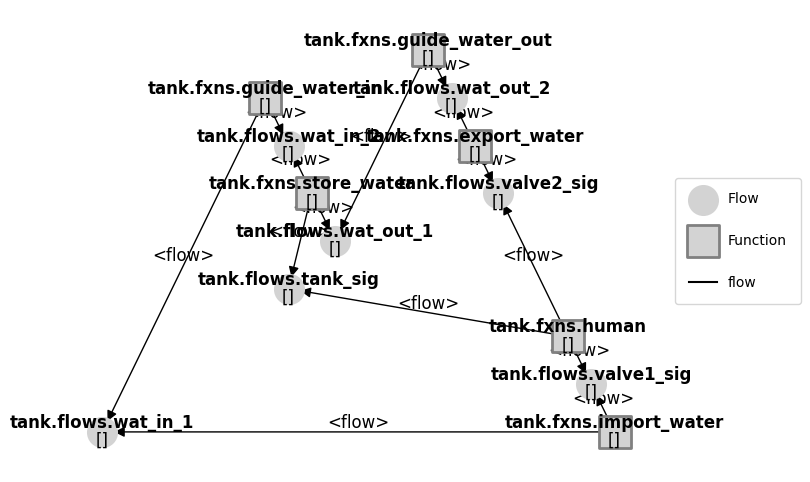

In [14]:

fig = result.tend.graph.draw(figsize=(8,6))

As can be seen, this gives a graphical representation of the functional model with the various flows. Since all of the functions are *grey*, no faults were accidentally introduced in this run.

A model history is additionally returned given our specified tracking options. If none are provided, the `default_track` variable in the `Model` is used (which in this case is set to `all`). It also shows the datatype for each (all arrays). See below:

In [15]:
mdlhist

m.sub_faults:                  array(21)
time:                          array(21)
flows.wat_in_1.s.effort:       array(21)
flows.wat_in_1.s.rate:         array(21)
flows.wat_in_2.s.effort:       array(21)
flows.wat_in_2.s.rate:         array(21)
flows.wat_out_1.s.effort:      array(21)
flows.wat_out_1.s.rate:        array(21)
flows.wat_out_2.s.effort:      array(21)
flows.wat_out_2.s.rate:        array(21)
flows.valve1_sig.s.indicator:  array(21)
flows.valve1_sig.s.action:     array(21)
flows.tank_sig.s.indicator:    array(21)
flows.tank_sig.s.action:       array(21)
flows.valve2_sig.s.indicator:  array(21)
flows.valve2_sig.s.action:     array(21)
fxns.import_water.s.amt_open:  array(21)
fxns.import_water.m.faults.stuck: array(21)
fxns.import_water.m.sub_faults: array(21)
fxns.guide_water_in.m.faults.clogged: array(21)
fxns.guide_water_in.m.faults.leak: array(21)
fxns.guide_water_in.m.sub_faults: array(21)
fxns.store_water.s.level:      array(21)
fxns.store_water.s.net_flow:   array(21

We can also look at the history of each function to check if it nominal or faulty. First checking to see if the the `store_water` function is nominal and then verifying that it is at the constant level throughout these time steps

In [16]:
mdlhist.fxns.store_water.m

faults.leak:                   array(21)
sub_faults:                    array(21)

In [17]:
mdlhist.fxns.store_water.s.level

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10.])

We can further look at the states of the model using `History.plot_line`. Input the specific graphs you want to see, here showing that water_in == water_out, that the store water value is constant, and that there is no signal from the tank to indicate anything is wrong. Note that units are not included.

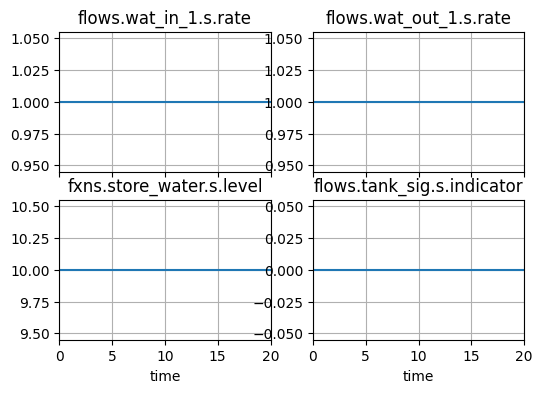

In [18]:
fig, ax = mdlhist.plot_line('flows.wat_in_1.s.rate', 
                               'flows.wat_out_1.s.rate', 
                               'fxns.store_water.s.level', 
                               'flows.tank_sig.s.indicator')

### History
If we want to see this data in tabular form, we can use `mdlhist.as_table()`. This also includes indexing on the table to only see parts of it.

This table is a pandas dataframe. We can save this dataframe to a .csv using `nominal_histtable.to_csv("filename.csv")`

In [19]:
nominal_histtable = mdlhist.as_table()
nominal_histtable[:10] #only displaying 10 

m.sub_faults  time  flows.wat_in_1.s.effort  flows.wat_in_1.s.rate  \
0         False   0.0                      1.0                    1.0   
1         False   1.0                      1.0                    1.0   
2         False   2.0                      1.0                    1.0   
3         False   3.0                      1.0                    1.0   
4         False   4.0                      1.0                    1.0   
5         False   5.0                      1.0                    1.0   
6         False   6.0                      1.0                    1.0   
7         False   7.0                      1.0                    1.0   
8         False   8.0                      1.0                    1.0   
9         False   9.0                      1.0                    1.0   

   flows.wat_in_2.s.effort  flows.wat_in_2.s.rate  flows.wat_out_1.s.effort  \
0                      1.0                    1.0                       1.0   
1                      1.0                    1.0                       1.0   
2                      1.0                    1.0                       1.0   
3                      1.0                    1.0                       1.0   
4                      1.0                    1.0                       1.0   
5                      1.0                    1.0                       1.0   
6                      1.0                    1.0                       1.0   
7                      1.0                    1.0                       1.0   
8                      1.0                    1.0                       1.0   
9                      1.0                    1.0                       1.0   

   flows.wat_out_1.s.rate  flows.wat_out_2.s.effort  flows.wat_out_2.s.rate  \
0                     1.0                       1.0                     1.0   
1                     1.0                       1.0                     1.0   
2                     1.0                       1.0                     1.0   
3                     1.0                       1.0                     1.0   
4                     1.0                       1.0                     1.0   
5                     1.0                       1.0                     1.0   
6                     1.0                       1.0                     1.0   
7                     1.0                       1.0                     1.0   
8                     1.0                       1.0                     1.0   
9                     1.0                       1.0                     1.0   

   ...  fxns.human.aa.acts.detect.m.faults.not_detected  \
0  ...                                            False   
1  ...                                            False   
2  ...                                            False   
3  ...                                            False   
4  ...                                            False   
5  ...                                            False   
6  ...                                            False   
7  ...                                            False   
8  ...                                            False   
9  ...                                            False   

   fxns.human.aa.acts.detect.m.sub_faults  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   
5                                   False   
6                                   False   
7                                   False   
8                                   False   
9                                   False   

   fxns.human.aa.acts.reach.m.faults.unable  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   
5                              

### What happens under component faults?


Here we model a leak of the tank. To compensate for this leak, the operator opens the first valve to a higher setting, maintaining the level of the tank. This is done with `propagate.one_fault`, which tells the model that a fault has occured and when it did occure. Note that this fault was part of the history earlier as `fxns.store_water.m.faults.leak`. 

Here, the store_water level drops until the indicator turns on and allows for the system to compensate to keep the tank from fully emptying. Blue represents nominal state and red is the fault scenario.

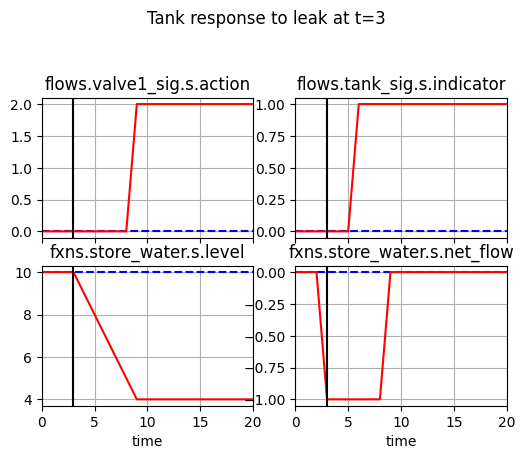

In [20]:
resgraph, mdlhist = propagate.one_fault(mdl,'store_water','leak', time=3,track='all',to_return=['graph','endclass','endfaults'])

fig, ax = mdlhist.plot_line('flows.valve1_sig.s.action', 'flows.tank_sig.s.indicator',
                            'fxns.store_water.s.level', 'fxns.store_water.s.net_flow',
                            title="Tank response to leak at t=3", time_slice=3, legend_loc=False, title_padding=0.1)


We can also view the model again with highlighed areas to show the faults visually. The `draw_from` function requires both the time step you're call (here, it's at `10` since that is after the fault occured). For more uses of this function, including animations, see `Pump_Example_Notebook.ipynb` in the pump example folder.

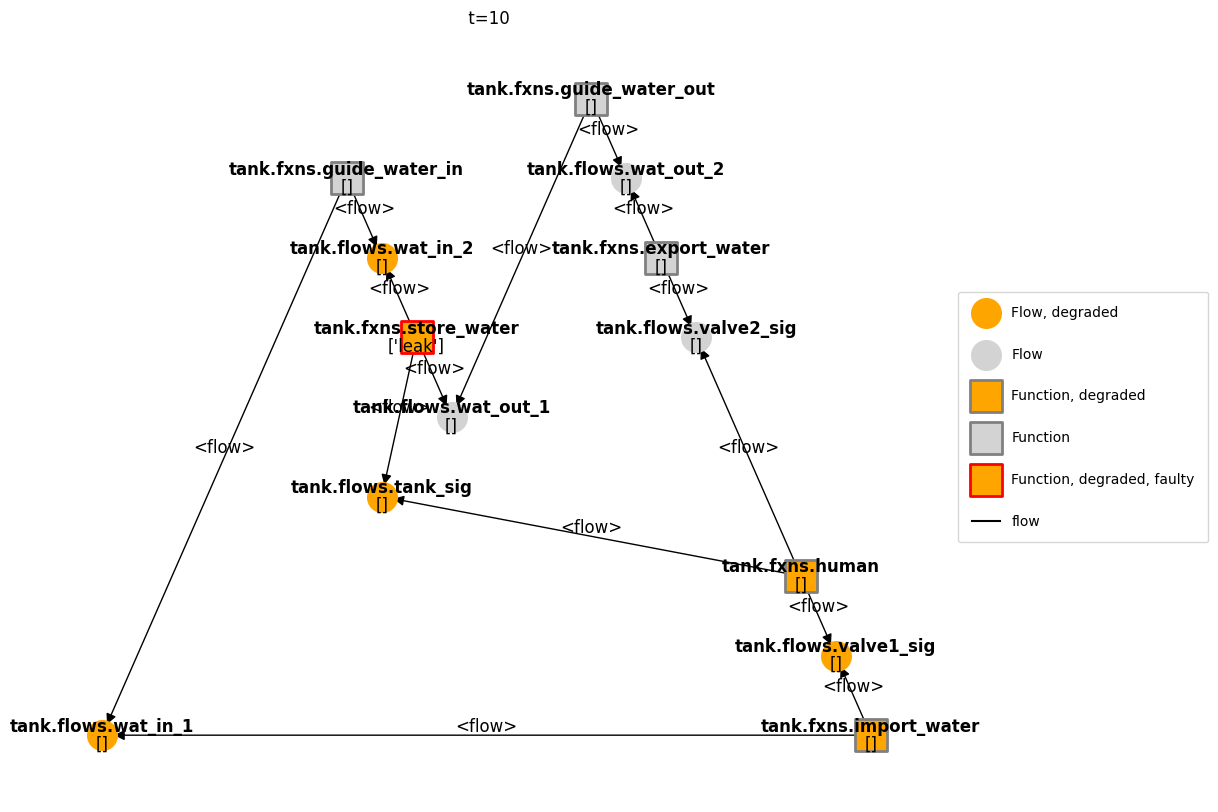

In [21]:
mg = FunctionArchitectureGraph(mdl)
fig, ax = mg.draw_from(10, mdlhist)

Now mdlhist has double the number of entries--those corresponding to the nominal and faulty scenarios.

In [22]:

fault_histtable = mdlhist.as_table()
fault_histtable


nominal.m.sub_faults  nominal.time  nominal.flows.wat_in_1.s.effort  \
0                  False           0.0                              1.0   
1                  False           1.0                              1.0   
2                  False           2.0                              1.0   
3                  False           3.0                              1.0   
4                  False           4.0                              1.0   
5                  False           5.0                              1.0   
6                  False           6.0                              1.0   
7                  False           7.0                              1.0   
8                  False           8.0                              1.0   
9                  False           9.0                              1.0   
10                 False          10.0                              1.0   
11                 False          11.0                              1.0   
12                 False          12.0                              1.0   
13                 False          13.0                              1.0   
14                 False          14.0                              1.0   
15                 False          15.0                              1.0   
16                 False          16.0                              1.0   
17                 False          17.0                              1.0   
18                 False          18.0                              1.0   
19                 False          19.0                              1.0   
20                 False          20.0                              1.0   

    nominal.flows.wat_in_1.s.rate  nominal.flows.wat_in_2.s.effort  \
0                             1.0                              1.0   
1                             1.0                              1.0   
2                             1.0                              1.0   
3                             1.0                              1.0   
4                             1.0                              1.0   
5                             1.0                              1.0   
6                             1.0                              1.0   
7                             1.0                              1.0   
8                             1.0                              1.0   
9                             1.0                              1.0   
10                            1.0                              1.0   
11                            1.0                              1.0   
12                            1.0                              1.0   
13                            1.0                              1.0   
14                            1.0                              1.0   
15                            1.0                              1.0   
16                            1.0                              1.0   
17                            1.0                              1.0   
18                            1.0                              1.0   
19                            1.0                              1.0   
20                            1.0                              1.0   

    nominal.flows.wat_in_2.s.rate  nominal.flows.wat_out_1.s.effort  \
0                             1.0                               1.0   
1                             1.0                               1.0   
2                             1.0                               1.0   
3                             1.0                               1.0   
4                             1.0                               1.0   
5                             1.0                               1.0   
6                             1.0                               1.0   
7                             1.0                               1.0   
8                             1.0                               1.0   
9                             1.0                               1.0   
10                            1

Note how, compared to the previos history table, this one does not include all values rather only the component that was affected (IE the store water function. We can further us `History.get_degraded_hist` compares the results over time so we can see what functions and flows were degraded over time. We can then use the summary to view a list of the functions and flows that were impacted over time.

We can the the view it as a table again, but compared to the previous it only shows if the fault occurs.

In [23]:
deghist = mdlhist.get_degraded_hist(*mdl.fxns, *mdl.flows)
deghist.as_table()

import_water  guide_water_in  store_water  guide_water_out  export_water  \
0          False           False        False            False         False   
1          False           False        False            False         False   
2          False           False        False            False         False   
3          False           False         True            False         False   
4          False           False         True            False         False   
5          False           False         True            False         False   
6          False           False         True            False         False   
7          False           False         True            False         False   
8          False           False         True            False         False   
9           True           False         True            False         False   
10          True           False         True            False         False   
11          True           False         True            False         False   
12          True           False         True            False         False   
13          True           False         True            False         False   
14          True           False         True            False         False   
15          True           False         True            False         False   
16          True           False         True            False         False   
17          True           False         True            False         False   
18          True           False         True            False         False   
19          True           False         True            False         False   
20          True           False         True            False         False   

    human  wat_in_1  wat_in_2  wat_out_1  wat_out_2  valve1_sig  tank_sig  \
0   False     False     False      False      False       False     False   
1   False     False     False      False      False       False     False   
2   False     False     False      False      False       False     False   
3   False     False     False      False      False       False     False   
4   False     False     False      False      False       False     False   
5   False     False     False      False      False       False     False   
6    True     False     False      False      False       False      True   
7    True     False     False      False      False       False      True   
8    True     False     False      False      False       False      True   
9    True      True      True      False      False        True      True   
10   True      True      True      False      False        True      True   
11   True      True      True      False      False        True      True   
12   True      True      True      False      False        True      True   
13   True      True      True      False      False        True      True   
14   True      True      True      False      False        True      True   
15   True      True      True      False      False        True      True   
16   True      True      True      False      False        True      True   
17   True      True      True      False      False        True      True   
18   True      True      True      False      False        True      True   
19   True      True      True      False      False        True      True   
20   True      True      True      False      False        True      True   

    valve2_sig  total  time  
0        False      0   0.0  
1        False      0   1.0  
2        False      0   2.0  
3        False      1   3.0  
4        False      1   4.0  
5        False      1   5.0  
6        False      3   6.0  
7        False      3   7.0  
8        False      3   8.0  
9        False      7   9.0  
10       False      7  10.0  
11       False      7  11.0  
12       False      7  12.0  
13       False      7  13.0  
14       False      7  14.0  
15       False      7  15.0  
16       False      7  16.0  
17      

### What about human-induced faults?

Here we evaluate what happens if the operator thinks they see a low or high indicator and takes those given actions.

Note that in these cases, because of the indicator/procedures, the operators are able to correct for the fault.

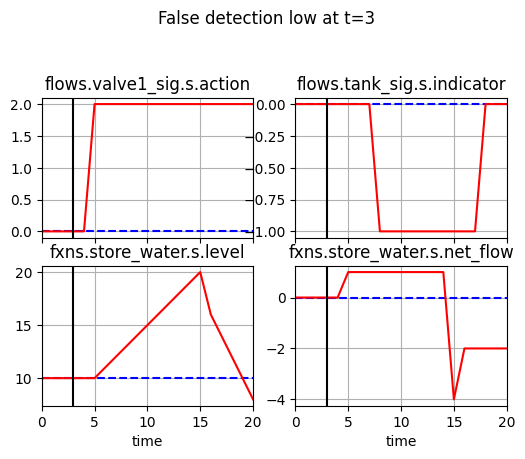

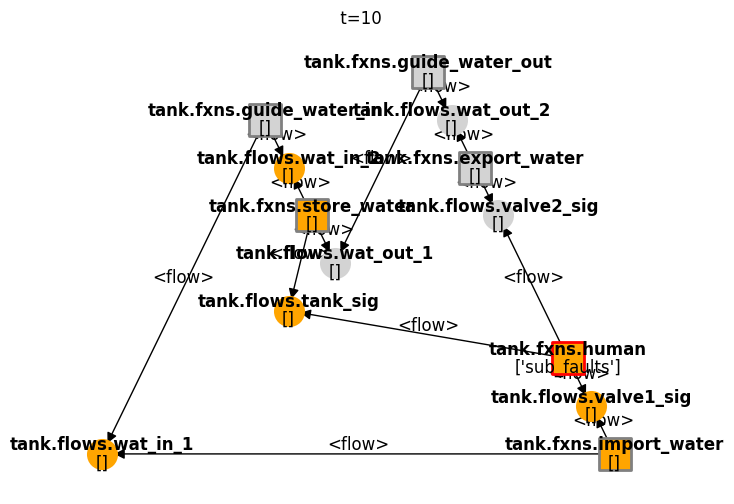

In [24]:
resgraph, mdlhist = propagate.one_fault(mdl,'human.aa.acts.detect','false_low', time=3, track='all',to_return=['graph','endclass','endfaults'])

fig, ax = mdlhist.plot_line('flows.valve1_sig.s.action',
                       'flows.tank_sig.s.indicator',
                       'fxns.store_water.s.level', 
                       'fxns.store_water.s.net_flow',title="False detection low at t=3",time_slice=3,legend_loc=False, title_padding=0.1)

mg = FunctionArchitectureGraph(mdl)
fig, ax = mg.draw_from(10, mdlhist, figsize=(8,6), withlegend=False, rem_ind=2) #set size and remove legend for legibility.

In [25]:
deghist = mdlhist.get_degraded_hist(*mdl.fxns, *mdl.flows)
deghist.as_table()

import_water  guide_water_in  store_water  guide_water_out  export_water  \
0          False           False        False            False         False   
1          False           False        False            False         False   
2          False           False        False            False         False   
3          False           False        False            False         False   
4          False           False        False            False         False   
5           True           False         True            False         False   
6           True           False         True            False         False   
7           True           False         True            False         False   
8           True           False         True            False         False   
9           True           False         True            False         False   
10          True           False         True            False         False   
11          True           False         True            False         False   
12          True           False         True            False         False   
13          True           False         True            False         False   
14          True           False         True            False         False   
15          True           False         True            False         False   
16          True           False         True            False         False   
17          True           False         True            False         False   
18          True           False         True            False         False   
19          True           False         True            False         False   
20          True           False         True            False         False   

    human  wat_in_1  wat_in_2  wat_out_1  wat_out_2  valve1_sig  tank_sig  \
0   False     False     False      False      False       False     False   
1   False     False     False      False      False       False     False   
2   False     False     False      False      False       False     False   
3    True     False     False      False      False       False     False   
4    True     False     False      False      False       False     False   
5    True      True      True      False      False        True     False   
6    True      True      True      False      False        True     False   
7    True      True      True      False      False        True     False   
8    True      True      True      False      False        True      True   
9    True      True      True      False      False        True      True   
10   True      True      True      False      False        True      True   
11   True      True      True      False      False        True      True   
12   True      True      True      False      False        True      True   
13   True      True      True      False      False        True      True   
14   True      True      True      False      False        True      True   
15   True      True      True       True       True        True      True   
16   True      True      True       True       True        True      True   
17   True      True      True       True       True        True      True   
18   True      True      True       True       True        True     False   
19   True      True      True       True       True        True     False   
20   True      True      True       True       True        True     False   

    valve2_sig  total  time  
0        False      0   0.0  
1        False      0   1.0  
2        False      0   2.0  
3        False      1   3.0  
4        False      1   4.0  
5        False      6   5.0  
6        False      6   6.0  
7        False      6   7.0  
8        False      7   8.0  
9        False      7   9.0  
10       False      7  10.0  
11       False      7  11.0  
12       False      7  12.0  
13       False      7  13.0  
14       False      7  14.0  
15       False      9  15.0  
16       False      9  16.0  
17      

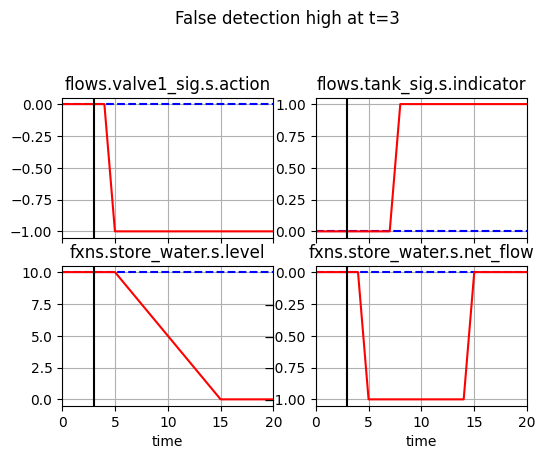

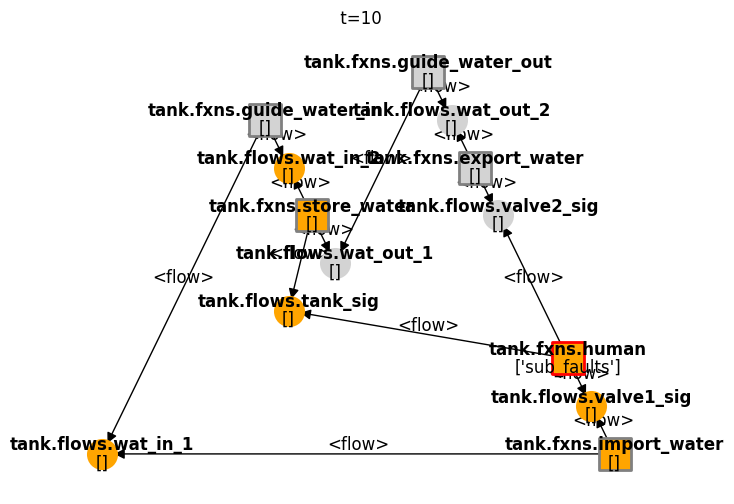

In [26]:
resgraph, mdlhist = propagate.one_fault(mdl,'human.aa.acts.detect','false_high', time=3, track='all',to_return=['graph','endclass','endfaults'])

fig, ax = mdlhist.plot_line('flows.valve1_sig.s.action',
                       'flows.tank_sig.s.indicator',
                       'fxns.store_water.s.level', 
                       'fxns.store_water.s.net_flow',
                       title="False detection high at t=3",time_slice=3,legend_loc=False, title_padding=0.1)

mg = FunctionArchitectureGraph(mdl)
fig, ax = mg.draw_from(10, mdlhist, figsize=(8,6), withlegend=False) #set size and remove legend for legibility.

### Evaluating Joint Component-Human fault modes 

To understand where the risks of failure are, we need to find the scenarios, that, with the modelled human controls, still lead to failures. To assess this, we develop a fault sampling strategy using `FaultDomain` and `FaultSample`.

In [27]:
fd = FaultDomain(mdl)
fd.add_all()
fs = FaultSample(fd)
fs.add_fault_phases()
fs

FaultSample of scenarios: 
 - tank_fxns_import_water_stuck_t0p0
 - tank_fxns_guide_water_in_clogged_t0p0
 - tank_fxns_guide_water_in_leak_t0p0
 - tank_fxns_store_water_leak_t0p0
 - tank_fxns_guide_water_out_clogged_t0p0
 - tank_fxns_guide_water_out_leak_t0p0
 - tank_fxns_export_water_stuck_t0p0
 - tank_fxns_human_aa_acts_look_not_visible_t0p0
 - tank_fxns_human_aa_acts_detect_false_high_t0p0
 - tank_fxns_human_aa_acts_detect_false_low_t0p0
 - ... (30 total)

In [28]:
endclasses, mdlhists = propagate.fault_sample(mdl, fs)

SCENARIOS COMPLETE: 100%|██████████| 30/30 [00:01<00:00, 19.24it/s]


Here we consider all single and joint-fault scenarios in the set of simulations to see which ones lead to failure:

In [29]:
fs.add_fault_phases(n_joint=2)
endclasses, mdlhists=propagate.fault_sample(mdl, fs, track="all")

SCENARIOS COMPLETE: 100%|██████████| 240/240 [00:12<00:00, 19.53it/s]


In [30]:
fmea_tab = an.tabulate.result_summary_fmea(endclasses, mdlhist) #note, this is currently behaving odd even without the joint fault cases
fmea_tab

degraded faulty      rate  \
nominal                                                  []     []       1.0   
human_aa_acts_detect_false_high_t3                       []     []       NaN   
tank_fxns_import_water_stuck_t0p0                       NaN    NaN       0.0   
tank_fxns_guide_water_in_clogged_t0p0                   NaN    NaN   0.00001   
tank_fxns_guide_water_in_leak_t0p0                      NaN    NaN   0.00001   
...                                                     ...    ...       ...   
tank_fxns_human_aa_acts_reach_unable__tank_fxns...      NaN    NaN  0.032432   
tank_fxns_human_aa_acts_reach_unable__tank_fxns...      NaN    NaN  0.016216   
tank_fxns_human_aa_acts_grasp_cannot__tank_fxns...      NaN    NaN  0.005544   
tank_fxns_human_aa_acts_grasp_cannot__tank_fxns...      NaN    NaN  0.002772   
tank_fxns_human_aa_acts_turn_cannot__tank_fxns_...      NaN    NaN   0.03842   

                                                         cost expected_cost  
nominal                                                   0.0           0.0  
human_aa_acts_detect_false_high_t3                        NaN           NaN  
tank_fxns_import_water_stuck_t0p0                         0.0           0.0  
tank_fxns_guide_water_in_clogged_t0p0               1000000.0     1000000.0  
tank_fxns_guide_water_in_leak_t0p0                        0.0           0.0  
...                                                       ...           ...  
tank_fxns_human_aa_acts_reach_unable__tank_fxns...        0.0           0.0  
tank_fxns_human_aa_acts_reach_unable__tank_fxns...        0.0           0.0  
tank_fxns_human_aa_acts_grasp_cannot__tank_fxns...        0.0           0.0  
tank_fxns_human_aa_acts_grasp_cannot__tank_fxns...        0.0           0.0  
tank_fxns_human_aa_acts_turn_cannot__tank_fxns_...        0.0           0.0  

[242 rows x 5 columns]

Next, we can filter out non-failures and sort by the failures with the highest expected cost (though rate would give the same results here)

In [31]:
failure_tab = fmea_tab[fmea_tab['cost'] > 1]
failure_tab.sort_values('expected_cost', ascending = False)

degraded faulty      rate  \
tank_fxns_human_aa_acts_detect_false_high_t0p0          NaN    NaN  0.231504   
tank_fxns_human_aa_acts_detect_false_low_t0p0           NaN    NaN  0.231504   
tank_fxns_human_aa_acts_detect_false_high__tank...      NaN    NaN  0.053594   
tank_fxns_human_aa_acts_detect_false_high__tank...      NaN    NaN  0.032086   
tank_fxns_guide_water_in_clogged_t0p0                   NaN    NaN   0.00001   
...                                                     ...    ...       ...   
tank_fxns_guide_water_out_leak__tank_fxns_expor...      NaN    NaN      -0.0   
tank_fxns_import_water_stuck__tank_fxns_guide_w...      NaN    NaN      -0.0   
tank_fxns_import_water_stuck__tank_fxns_guide_w...      NaN    NaN      -0.0   
tank_fxns_export_water_stuck__tank_fxns_human_a...      NaN    NaN -0.000001   
tank_fxns_export_water_stuck__tank_fxns_human_a...      NaN    NaN -0.000001   

                                                         cost  \
tank_fxns_human_aa_acts_detect_false_high_t0p0      1000000.0   
tank_fxns_human_aa_acts_detect_false_low_t0p0       1000000.0   
tank_fxns_human_aa_acts_detect_false_high__tank...  1000000.0   
tank_fxns_human_aa_acts_detect_false_high__tank...  1000000.0   
tank_fxns_guide_water_in_clogged_t0p0               1000000.0   
...                                                       ...   
tank_fxns_guide_water_out_leak__tank_fxns_expor...  1000000.0   
tank_fxns_import_water_stuck__tank_fxns_guide_w...  1000000.0   
tank_fxns_import_water_stuck__tank_fxns_guide_w...  1000000.0   
tank_fxns_export_water_stuck__tank_fxns_human_a...  1000000.0   
tank_fxns_export_water_stuck__tank_fxns_human_a...  1000000.0   

                                                         expected_cost  
tank_fxns_human_aa_acts_detect_false_high_t0p0      23150399999.999996  
tank_fxns_human_aa_acts_detect_false_low_t0p0       23150399999.999996  
tank_fxns_human_aa_acts_detect_false_high__tank...   5359410201.599999  
tank_fxns_human_aa_acts_detect_false_high__tank...        3208645440.0  
tank_fxns_guide_water_in_clogged_t0p0                        1000000.0  
...                                                                ...  
tank_fxns_guide_water_out_leak__tank_fxns_expor...           -3.166667  
tank_fxns_import_water_stuck__tank_fxns_guide_w...           -3.166667  
tank_fxns_import_water_stuck__tank_fxns_guide_w...           -3.166667  
tank_fxns_export_water_stuck__tank_fxns_human_a...            -73309.6  
tank_fxns_export_water_stuck__tank_fxns_human_a...            -73309.6  

[103 rows x 5 columns]

One of the top modes is a joint human-component failure mode. Let's see what happens in this case:

In [32]:
[*mdlhists.keys()]

['nominal.m.sub_faults',
 'nominal.time',
 'nominal.flows.wat_in_1.s.effort',
 'nominal.flows.wat_in_1.s.rate',
 'nominal.flows.wat_in_2.s.effort',
 'nominal.flows.wat_in_2.s.rate',
 'nominal.flows.wat_out_1.s.effort',
 'nominal.flows.wat_out_1.s.rate',
 'nominal.flows.wat_out_2.s.effort',
 'nominal.flows.wat_out_2.s.rate',
 'nominal.flows.valve1_sig.s.indicator',
 'nominal.flows.valve1_sig.s.action',
 'nominal.flows.tank_sig.s.indicator',
 'nominal.flows.tank_sig.s.action',
 'nominal.flows.valve2_sig.s.indicator',
 'nominal.flows.valve2_sig.s.action',
 'nominal.fxns.import_water.s.amt_open',
 'nominal.fxns.import_water.m.faults.stuck',
 'nominal.fxns.import_water.m.sub_faults',
 'nominal.fxns.guide_water_in.m.faults.clogged',
 'nominal.fxns.guide_water_in.m.faults.leak',
 'nominal.fxns.guide_water_in.m.sub_faults',
 'nominal.fxns.store_water.s.level',
 'nominal.fxns.store_water.s.net_flow',
 'nominal.fxns.store_water.m.faults.leak',
 'nominal.fxns.store_water.m.sub_faults',
 'nominal.

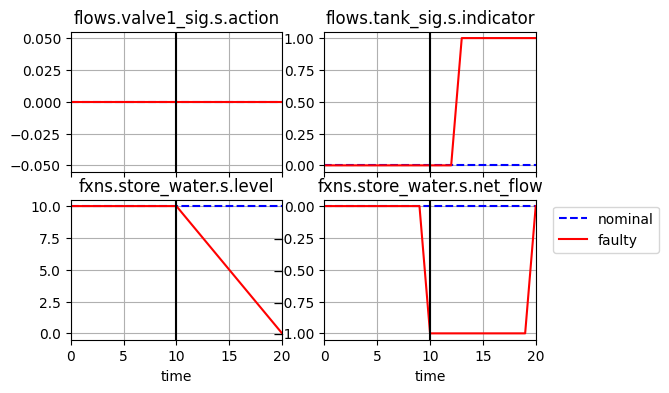

In [33]:
from fmdtools.analyze.history import History
scenhists = History({'nominal':mdlhists.nominal, 
            'faulty':mdlhists.get('tank_fxns_guide_water_in_leak__tank_fxns_human_aa_acts_detect_not_detected_t10p0')})
#scenhists.flatten()
fig, axs = scenhists.plot_line('flows.valve1_sig.s.action',
                       'flows.tank_sig.s.indicator',
                       'fxns.store_water.s.level', 
                       'fxns.store_water.s.net_flow', time_slice=[10])


In this case, there is a leak, but the operator cannot turn the valve, resulting in the tank filling too high, which is a failure.

To consider the leak again, we can see what happens when the leak is not detected:

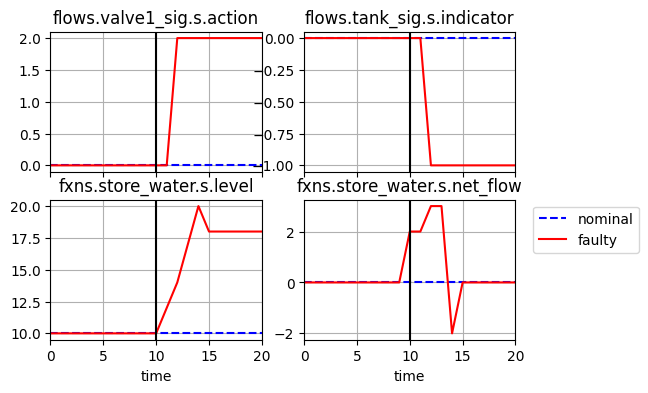

In [34]:
scenhists =History({'nominal':mdlhists.nominal, 'faulty':mdlhists.get('tank_fxns_guide_water_out_leak__tank_fxns_human_aa_acts_detect_false_low_t10p0')})
scenhists.flatten()
fig, axs = scenhists.plot_line('flows.valve1_sig.s.action',
                       'flows.tank_sig.s.indicator',
                       'fxns.store_water.s.level', 
                       'fxns.store_water.s.net_flow',
                       time_slice=[10])

In this case, there is a leak, but it is not caugh, resulting in a failure again.

### Testing different reaction times

The model set up in `tank_model` is parameterized by the reaction time of the operator. As a result, we can assess how long or short reaction times affect the given scenarios.

In [35]:
mdl_long_reaction_time = Tank(p={'reacttime':10, "store_tstep":1.0}, track='all') #also needs reconfiguring

In this case, we will show the affect of reaction time on the operator's ability to catch a leak.

(<Figure size 1200x1000 with 1 Axes>, <Axes: >)

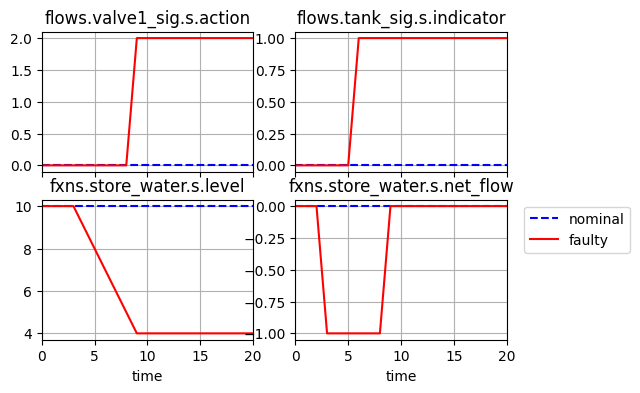

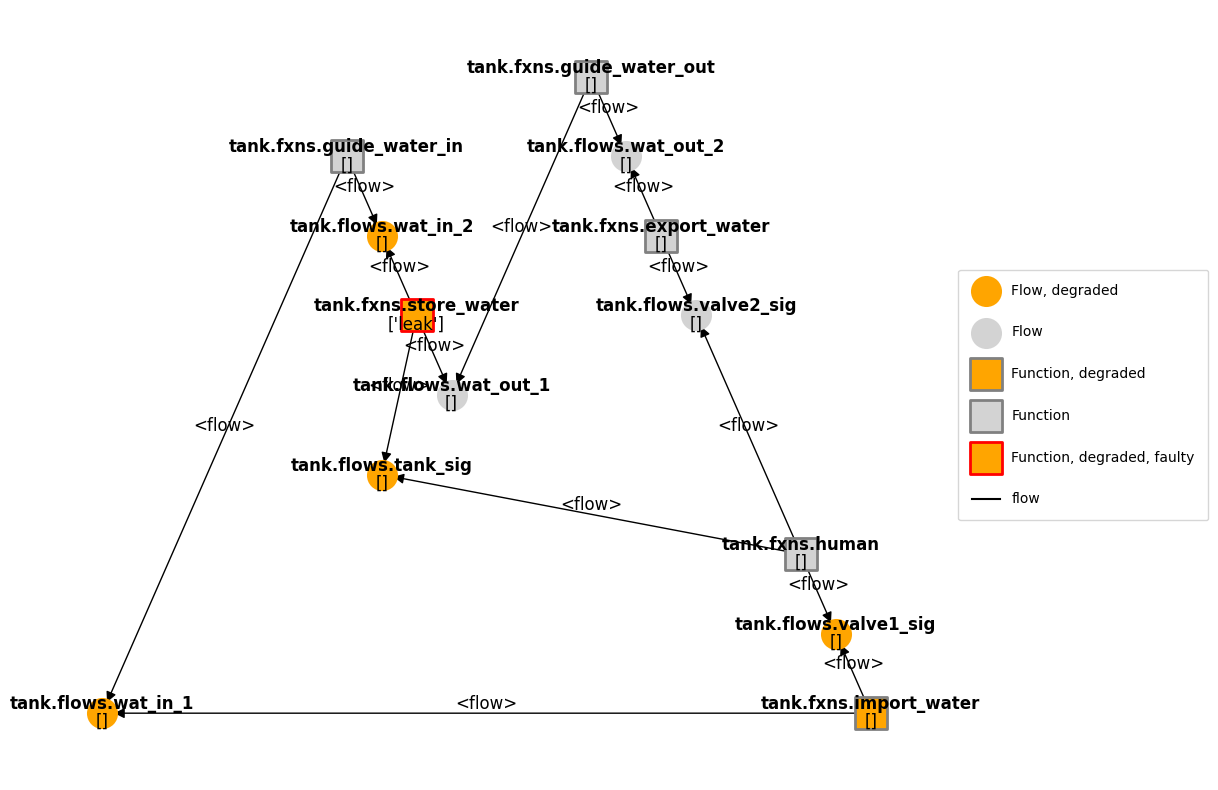

In [37]:
result, mdlhist = propagate.one_fault(mdl_long_reaction_time,'store_water','leak', time=3,track="all", to_return='graph')

fig, axs = mdlhist.plot_line('flows.valve1_sig.s.action',
                       'flows.tank_sig.s.indicator',
                       'fxns.store_water.s.level', 
                       'fxns.store_water.s.net_flow')

result.faulty.tend.graph.draw()


As shown, the operator does not respond in time, resulting in the tank draining all the way, a failure state. We can further use the `propagate.approach` function to compare the number of scenarios caught in this system compared with the other.